In [20]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import threshold_niblack, threshold_sauvola

# ===== PATHS =====
image_dir = r"C:\Users\tripa\OneDrive\Desktop\IIITR B.TECH\SEM-06\MIP\Assignment 02\archive\DRIVE\training\images"
gt_dir = r"C:\Users\tripa\OneDrive\Desktop\IIITR B.TECH\SEM-06\MIP\Assignment 02\archive\DRIVE\training\1st_manual"
mask_dir = r"C:\Users\tripa\OneDrive\Desktop\IIITR B.TECH\SEM-06\MIP\Assignment 02\archive\DRIVE\training\mask"

# ===== LOAD FILES =====
image_files = sorted(os.listdir(image_dir))
gt_files = sorted(os.listdir(gt_dir))
mask_files = sorted(os.listdir(mask_dir))

image_path = os.path.join(image_dir, image_files[0])
gt_path = os.path.join(gt_dir, gt_files[0])
mask_path = os.path.join(mask_dir, mask_files[0])

In [21]:
# Read image and extract green channel
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
green = image_rgb[:, :, 1]

window_size = 25
thresh_nib = threshold_niblack(green, window_size=window_size, k=0.2)
binary_nib = green > thresh_nib

In [22]:
thresh_sau = threshold_sauvola(green, window_size=25)
binary_sau = green > thresh_sau

In [23]:
from PIL import Image

print("mask_path:", mask_path)
print("mask_path exists:", os.path.exists(mask_path))

# Use PIL to read GIF files
fov_pil = Image.open(mask_path).convert('L')
fov = np.array(fov_pil)
fov = (fov > 0)

binary_nib = binary_nib * fov
binary_sau = binary_sau * fov

mask_path: C:\Users\tripa\OneDrive\Desktop\IIITR B.TECH\SEM-06\MIP\Assignment 02\archive\DRIVE\training\mask\21_training_mask.gif
mask_path exists: True


In [24]:
gt_pil = Image.open(gt_path).convert('L')
gt = np.array(gt_pil)
gt = (gt > 0)

In [25]:
def sensitivity(pred, gt):
    TP = np.sum((pred == 1) & (gt == 1))
    FN = np.sum((pred == 0) & (gt == 1))
    return TP / (TP + FN + 1e-7)

In [26]:
print("Niblack Sensitivity:", sensitivity(binary_nib, gt))
print("Sauvola Sensitivity:", sensitivity(binary_sau, gt))

Niblack Sensitivity: 0.16870792440518814
Sauvola Sensitivity: 0.8688052558971985


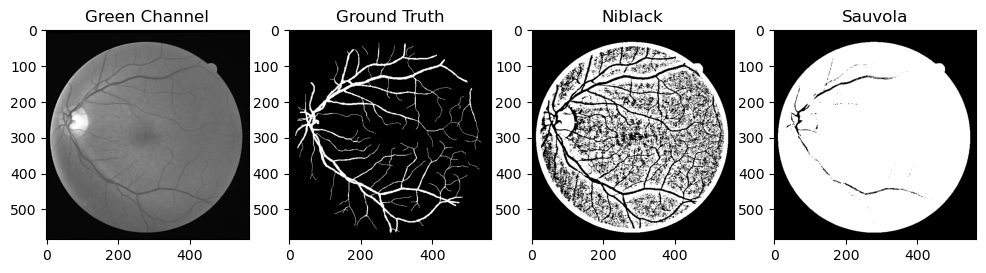

In [27]:
plt.figure(figsize=(12,6))

plt.subplot(1,4,1)
plt.imshow(green, cmap='gray')
plt.title("Green Channel")

plt.subplot(1,4,2)
plt.imshow(gt, cmap='gray')
plt.title("Ground Truth")

plt.subplot(1,4,3)
plt.imshow(binary_nib, cmap='gray')
plt.title("Niblack")

plt.subplot(1,4,4)
plt.imshow(binary_sau, cmap='gray')
plt.title("Sauvola")

plt.show()